In [1]:
from utils_v1 import *

from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
from src.dataset import (
    DeforestationTime, MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates, 
    MT, MTDeforestationTime, MTMultipleDates
)
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
import matplotlib.pyplot as plt
import matplotlib

from tifffile import imsave
import src.rasterTools as rasterTools


In [2]:
training = False
save_probabilities = False
loadInference = False


addPastDeforestationInput = True
'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2018, 2019]
# dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = addPastDeforestationInput,
# 	borderBuffer = 2)	
dates = [2019, 2020]
dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	addPastDeforestationInput = addPastDeforestationInput,
	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = 10


if training == False:


	if type(dataset) == PAMultipleDates:
		# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date
		threshold_uncertainty = 0.1476584111529534

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date
		threshold_uncertainty = 0.1722648842106805

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [3]:
threshold_uncertainty

0.1722648842106805

In [4]:
# exp

In [5]:
# Loading reference
label_mask = dataset.loadLabel()
print('Mask label shape: ', '\n', label_mask.shape, '\n', 'Unique values: ', '\n', np.unique(label_mask))

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]


(-0.5, 10419.5, 16794.5, -0.5)

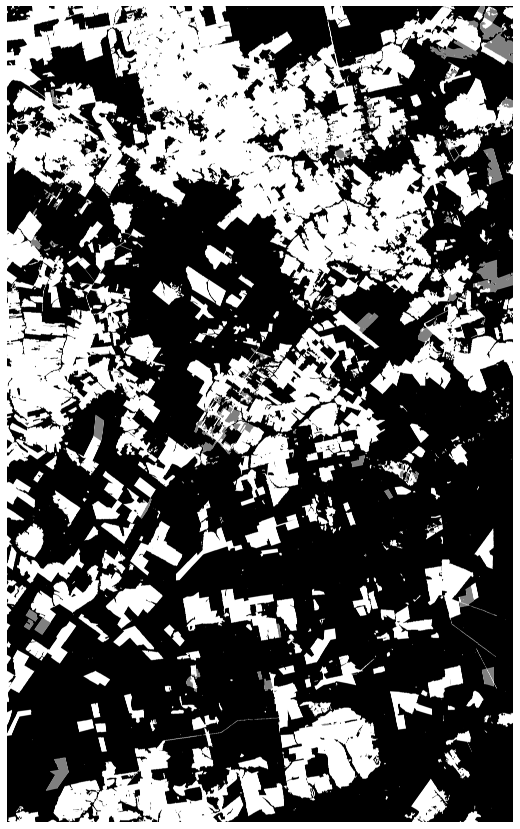

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.axis('off')


In [7]:
# Creating tile mask

mask_tiles = create_mask(label_mask.shape[0], label_mask.shape[1], 
        grid_size=(dataset.grid_x, dataset.grid_y))
label_mask = label_mask[:mask_tiles.shape[0], :mask_tiles.shape[1]]

Tiles size:  3359 2084
Mask size:  (16795, 10420)


In [8]:
# Loading image stack
image_stack = dataset.loadInputImage()

print('Image shape: ', image_stack.shape)
channels = image_stack.shape[-1]
image_stack = image_stack[:mask_tiles.shape[0], :mask_tiles.shape[1],:]
print('mask: ',mask_tiles.shape)
print('image stack: ', image_stack.shape)
print('ref :', label_mask.shape)
#plt.imshow(mask_tiles)

ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)


In [9]:
ic(image_stack.shape)
channels = image_stack.shape[-1]
ic(channels)

ic| image_stack.shape: (16795, 10420, 21)
ic| channels: 21


21

In [10]:
mask_tr_val, mask_amazon_ts = dataset.getTrainValTestMasks(mask_tiles)


Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


In [11]:
# Creating folder for the experiment

'''
path_exp = dataset.paths.experiment + 'exp' + str(exp)
path_models = path_exp+'/models'
path_maps = path_exp+'/pred_maps'

if not os.path.exists(path_exp):
    os.makedirs(path_exp)   
if not os.path.exists(path_models):
    os.makedirs(path_models)   
if not os.path.exists(path_maps):
    os.makedirs(path_maps)
'''    
times = 1
method = 'resunet'
nb_filters = [16, 32, 64, 128, 256]
weights = [0.1, 0.9, 0]

In [12]:
if not issubclass(type(dataset), DeforestationTime):
    patchesHandler.dataset.image_channels[-1]

In [13]:
if issubclass(type(dataset), MultipleDates):
	channels = patchesHandler.input_image_shape
	image_stack = image_stack[..., patchesHandler.dataset.image_channels[-1]]
	label_mask = label_mask[...,-1]

In [14]:
channels

21

In [15]:
image_stack.shape

(16795, 10420, 21)

In [16]:
if issubclass(type(dataset), MultipleDates):
	channels = patchesHandler.input_image_shape
	# image_stack = image_stack[..., patchesHandler.dataset.image_channels[-1]]
	# label_mask = label_mask[...,-1]

In [17]:
#%% Test loop
times = 10

metrics_ts = []
n_pool = 3
n_rows = 5
n_cols = 4
rows, cols = image_stack.shape[:2]
pad_rows = rows - np.ceil(rows/(n_rows*2**n_pool))*n_rows*2**n_pool
pad_cols = cols - np.ceil(cols/(n_cols*2**n_pool))*n_cols*2**n_pool
print(pad_rows, pad_cols)

npad = ((0, int(abs(pad_rows))), (0, int(abs(pad_cols))), (0, 0))
image1_pad = np.pad(image_stack, pad_width=npad, mode='reflect')
del image_stack


-5.0 -12.0


In [18]:

h, w, c = image1_pad.shape
c = channels
patch_size_rows = h//n_rows
patch_size_cols = w//n_cols
num_patches_x = int(h/patch_size_rows)
num_patches_y = int(w/patch_size_cols)


class_n = 3

if loadInference == False:
    if save_probabilities == False:
        # prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, inference_times), dtype = np.float32)
        prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], inference_times), dtype = np.float32)

    new_model = utils_v1.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, c), 
        nb_filters = nb_filters, n_classes = class_n, dropout_seed = None, training = False)

    patchesHandler.class_n = class_n

    metrics_all =[]
    with tf.device('/cpu:0'):
        for tm in range(0,inference_times):
            print('time: ', tm)
            
            # Recinstructing predicted map
            start_test = time.time()

            path_exp = dataset.paths.experiment + 'exp' + str(exp_ids[tm])
            path_models = path_exp + '/models'
            # ic(path_models+ '/' + method +'_'+str(0)+'.h5')
            model = load_model(path_models+ '/' + method +'_'+str(0)+'.h5', compile=False)
            for l in range(1, len(model.layers)):
                new_model.layers[l].set_weights(model.layers[l].get_weights())
            
            '''
            args_network = {'patch_size_rows': patch_size_rows,
                'patch_size_cols': patch_size_cols,
                'c': c,
                'nb_filters': nb_filters,
                'class_n': class_n,
                'dropout_seed': inference_times}
            '''
            prob_reconstructed = patchesHandler.infer(
                    new_model, image1_pad, h, w, 
                    # model, image1_pad, h, w, 
                    num_patches_x, num_patches_y, patch_size_rows, 
                    patch_size_cols)
                    # patch_size_cols, a = args_network)
                    
            ts_time =  time.time() - start_test

            if save_probabilities == True:
                np.save(path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
            else:
                prob_rec[:,:,tm] = prob_reconstructed
            
            metrics_all.append(ts_time)
            del prob_reconstructed
        metrics_ = np.asarray(metrics_all)
        # Saving test time
        np.save(path_exp+'/metrics_ts.npy', metrics_)


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [19]:
del image1_pad


In [20]:
# if loadInference == True:
if save_probabilities == True:
    prob_rec = np.zeros((h, w, times), dtype = np.float32)

    for tm in range (0, times):
        print(tm)
        prob_rec[:,:,tm] = np.load(path_maps+'/'+'prob_'+str(tm)+'.npy').astype(np.float32)

mean_prob = np.mean(prob_rec, axis = -1)



In [21]:
ic(mean_prob.shape)

ic| mean_prob.shape: (16800, 10432)


(16800, 10432)

In [22]:
label_mask.shape

(16795, 10420)

In [23]:
# Computing metrics over the test tiles
mean_prob = mean_prob[:label_mask.shape[0], :label_mask.shape[1]]

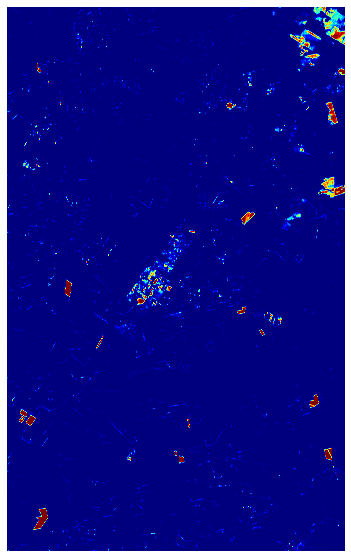

In [24]:
mean_prob = mean_prob.copy()
mean_prob[label_mask == 2] = 0
fig1 = plt.figure(figsize=(10,10))
plt.imshow(mean_prob, cmap = 'jet')
plt.axis('off')
plt.savefig('output/figures/Para prediction probability.png', dpi=150, bbox_inches='tight')

In [25]:
print(label_mask.shape)

(16795, 10420)


In [26]:
label_test = label_mask[mask_amazon_ts == 1]
mean_prob_test = mean_prob[mask_amazon_ts == 1]
mean_prob_test = mean_prob_test[label_test != 2]
label_test = label_test[label_test != 2]

print(label_test.shape)
print(np.unique(label_test, return_counts=True))

(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))


In [27]:
from icecream import ic

ic(prob_rec.shape)
prob_rec = np.transpose(prob_rec, (2, 0, 1))


ic| prob_rec.shape: (16800, 10432, 10)


In [28]:
prob_rec = np.expand_dims(prob_rec, axis = -1)

In [29]:
ic(prob_rec.shape)

ic| prob_rec.shape: (10, 16800, 10432, 1)


(10, 16800, 10432, 1)

In [30]:
print(mean_prob.shape)

# threshold = 0.420339
threshold = 0.5

predicted = np.zeros_like(mean_prob)

predicted[mean_prob>=threshold] = 1
predicted[mean_prob<threshold] = 0

print(np.unique(predicted, return_counts=True))

(16795, 10420)
(array([0., 1.], dtype=float32), array([173025168,   1978732], dtype=int64))


(-0.5, 10419.5, 16794.5, -0.5)

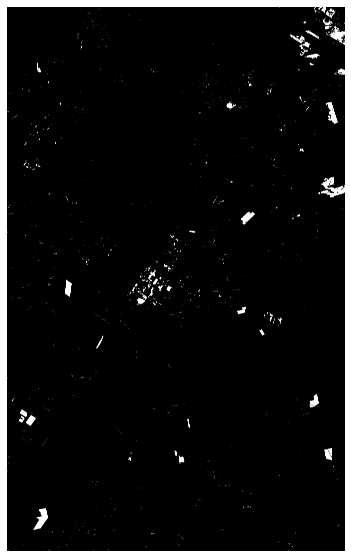

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(predicted, cmap = plt.cm.gray)
plt.axis('off')

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

epsilon = 1e-15
def show_im(im, ax, title = "", cmap = "jet"):
    im_plt = ax.imshow(im.astype(np.float32), cmap = cmap)
    plt.title(title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_plt, cax=cax) 

def get_mean(pred_probs):
      return np.mean(pred_probs, axis=0)
    
def get_uncertainty_var(pred_probs):
    return np.var(pred_probs, axis=0)
    
def predictive_variance(pred_probs):
    pred_var = get_uncertainty_var(pred_probs)
    pred_var = np.average(pred_var, axis = -1)
#    ic(pred_var.shape)
    return pred_var

def predictive_entropy(pred_probs):
    pred_mean = get_mean(pred_probs) # shape (patch_len, patch_len, class_n)
    pred_entropy = np.zeros((pred_mean.shape[0:2]))

    K = pred_mean.shape[-1]
    for k in range(K):
        pred_entropy = pred_entropy + pred_mean[..., k] * np.log(pred_mean[..., k] + epsilon) 
    pred_entropy = - pred_entropy / K
    return pred_entropy


def single_experiment_entropy(pred_prob):
    pred_entropy = np.zeros(pred_prob.shape[0:2])
    ic(pred_entropy.shape)
    
    K = pred_prob.shape[-1]
    for k in range(K):
        pred_entropy = pred_entropy + pred_prob[..., k] * np.log(pred_prob[..., k] + epsilon) 
    pred_entropy = - pred_entropy / K
    return pred_entropy

def mutual_information(pred_probs):
    H = predictive_entropy(pred_probs)
    sum_entropy = 0

    n = pred_probs.shape[0]
    K = pred_probs.shape[-1]
    ic(n, K)

    for i in range(n):
        for k in range(K):
            sum_entropy = sum_entropy + pred_probs[i, ..., k] * np.log(pred_probs[i, ..., k] + epsilon)

    sum_entropy = - sum_entropy / (n * K)

    MI = H - sum_entropy
    return MI

In [33]:
ic(prob_rec.shape)
ic(np.min(prob_rec), np.mean(prob_rec), np.max(prob_rec))


ic| prob_rec.shape: (10, 16800, 10432, 1)
ic| np.min(prob_rec): 2.2469558e-30
    np.mean(prob_rec): 0.015203303
    np.max(prob_rec): 1.0


(2.2469558e-30, 0.015203303, 1.0)

In [34]:
pred_entropy = predictive_entropy(prob_rec).astype(np.float32)
pred_entropy_to_show = pred_entropy.copy()[:label_mask.shape[0], :label_mask.shape[1]]

pred_entropy_to_show[label_mask == 2] = 0



In [35]:
ic(np.min(pred_entropy_to_show), np.mean(pred_entropy_to_show), np.max(pred_entropy_to_show))
ic(np.min(pred_entropy), np.mean(pred_entropy), np.max(pred_entropy))
ic(pred_entropy.shape, pred_entropy_to_show.shape)

ic| np.min(pred_entropy_to_show): 0.0
    np.mean(pred_entropy_to_show): 0.010480594
    np.max(pred_entropy_to_show): 0.36787948
ic| np.min(pred_entropy): 1.193959e-12
    np.mean(pred_entropy): 0.012668651
    np.max(pred_entropy): 0.36787948
ic| pred_entropy.shape: (16800, 10432)
    pred_entropy_to_show.shape: (16795, 10420)


((16800, 10432), (16795, 10420))

In [36]:
import utils_v1
label_mask_test = label_mask[mask_amazon_ts == 1]
pred_entropy_test = utils_v1.excludeBackgroundAreasFromTest(
        utils_v1.getTestVectorFromIm(
                utils_v1.unpadIm(pred_entropy, npad), mask_amazon_ts),
        label_mask_test)
y_pred = pred_entropy_test

In [37]:
ic(np.min(y_pred), np.mean(y_pred), np.max(y_pred))

ic| np.min(y_pred): 1.1724405e-08
    np.mean(y_pred): 0.015649185
    np.max(y_pred): 0.36787948


(1.1724405e-08, 0.015649185, 0.36787948)

In [38]:
importlib.reload(_metrics)


predicted_thresholded = np.zeros_like(y_pred).astype(np.int8)
predicted_thresholded[y_pred >= threshold_uncertainty] = 1
predicted_thresholded = predicted_thresholded.astype(np.uint8)
ic(predicted_thresholded.shape)


ic| predicted_thresholded.shape: (44657480,)


(44657480,)

In [39]:
ic(np.unique(predicted_thresholded, return_counts=True),
    np.unique(label_mask, return_counts=True),
    np.unique(mask_amazon_ts, return_counts=True))



ic| np.unique(predicted_thresholded, return_counts=True): (array([0, 1], dtype=uint8), array([43262466,  1395014], dtype=int64))
    np.unique(label_mask, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                array([109996296,   2271496,  62736108], dtype=int64))
    np.unique(mask_amazon_ts, return_counts=True): (array([0, 1], dtype=uint8), array([105002340,  70001560], dtype=int64))


((array([0, 1], dtype=uint8), array([43262466,  1395014], dtype=int64)),
 (array([0, 1, 2], dtype=uint8),
  array([109996296,   2271496,  62736108], dtype=int64)),
 (array([0, 1], dtype=uint8), array([105002340,  70001560], dtype=int64)))

In [40]:
def getUncertaintyPercentageFromTest(uncertainty_mask, 
        label_mask, mask_test):
    # total_test_area = mask_test.copy()
    # total_test_area[label_mask == 2] = 0
    total_test_area = mask_test[label_mask != 2] 
    total_test_area = total_test_area[total_test_area == 1]
    ic(uncertainty_mask.flatten().shape, total_test_area.shape)
    percentage = np.count_nonzero(uncertainty_mask.flatten()) / len(total_test_area.flatten())
    return total_test_area, percentage

ic(predicted_thresholded.shape, label_mask.shape, mask_amazon_ts.shape, label_mask.flatten().shape)
total_test_area, percentage = getUncertaintyPercentageFromTest(predicted_thresholded, 
        label_mask, mask_amazon_ts)

ic(percentage)

ic| predicted_thresholded.shape: (44657480,)
    label_mask.shape: (16795, 10420)
    mask_amazon_ts.shape: (16795, 10420)
    label_mask.flatten().shape: (175003900,)
ic| uncertainty_mask.flatten().shape: (44657480,)
    total_test_area.shape: (44657480,)
ic| percentage: 0.031238081503927227


0.031238081503927227

In [41]:

pred_entropy_unpad = utils_v1.unpadIm(pred_entropy, npad)
ic(pred_entropy_unpad.shape)



uncertainty_mask = np.zeros_like(pred_entropy_unpad).astype(np.int8)
uncertainty_mask[pred_entropy_unpad >= threshold_uncertainty] = 1

ignoreSmallPolygons = False
if ignoreSmallPolygons == True:
    min_polygon_area = 625 # pixels
    ic(np.unique(uncertainty_mask, return_counts=True))

    uncertainty_mask_without_small_polygons = skimage.morphology.area_opening(uncertainty_mask, 
        area_threshold = min_polygon_area, connectivity=1)

    
ic(np.unique(uncertainty_mask, return_counts=True))



ic| pred_entropy_unpad.shape: (16795, 10420)
ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64))


(array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64))

In [42]:
# cv2.imwrite("uncertainty_mask_without_small_polygons.png", uncertainty_mask_without_small_polygons*255)
# cv2.imwrite("uncertainty_mask.png", uncertainty_mask*255)


In [43]:
# ic(np.min(image_stack[...,[13,12,11]]), np.mean(image_stack[...,[13,12,11]]), np.max(image_stack[...,[13,12,11]]))


In [44]:
# plt.figure(figsize=(10,10))
# plt.imshow(image_stack[...,[13,12,11]])
# plt.axis('off')



In [45]:
# cv2.imwrite("MT_sentinel2_t0_rgb.png", image_stack[...,[3,2,1]])
## cv2.imwrite("MT_sentinel2_t0_rgb.png", (image_stack[...,[3,2,1]]*255).astype(np.uint8))
# cv2.imwrite("MT_sentinel2_t1_rgb.png", (image_stack[...,[13,12,11]]*255).astype(np.uint8))


In [46]:
# cv2.imwrite("MT_sentinel2_t0_rgb.png", (image_stack[...,[3,2,1]]*255).astype(np.uint8))

In [47]:
ic(pred_entropy_unpad.shape, label_mask.shape)

ic| pred_entropy_unpad.shape: (16795, 10420)
    label_mask.shape: (16795, 10420)


((16795, 10420), (16795, 10420))

In [48]:
'''
def getUncertaintyMask(uncertainty):

    uncertainty_mask = np.zeros_like(uncertainty).astype(np.uint8)
    uncertainty_mask[uncertainty >= 0.15] = 1
    return uncertainty_mask
def maskOutPastDeforestation(uncertainty_mask, label_mask):
    uncertainty_mask[label_mask == 2] = 0
    return uncertainty_mask

uncertainty_mask = getUncertaintyMask(pred_entropy_unpad)
uncertainty_mask = maskOutPastDeforestation(uncertainty_mask, label_mask)
ic(np.unique(uncertainty_mask, return_counts=True))
'''

'\ndef getUncertaintyMask(uncertainty):\n\n    uncertainty_mask = np.zeros_like(uncertainty).astype(np.uint8)\n    uncertainty_mask[uncertainty >= 0.15] = 1\n    return uncertainty_mask\ndef maskOutPastDeforestation(uncertainty_mask, label_mask):\n    uncertainty_mask[label_mask == 2] = 0\n    return uncertainty_mask\n\nuncertainty_mask = getUncertaintyMask(pred_entropy_unpad)\nuncertainty_mask = maskOutPastDeforestation(uncertainty_mask, label_mask)\nic(np.unique(uncertainty_mask, return_counts=True))\n'

In [49]:
'''
uncertainty_mask_test = uncertainty_mask[mask_amazon_ts==1]
label_test = label_mask[mask_amazon_ts==1]

uncertainty_mask_test = uncertainty_mask_test[label_test!=2]

ic(uncertainty_mask_test.shape)
'''

'\nuncertainty_mask_test = uncertainty_mask[mask_amazon_ts==1]\nlabel_test = label_mask[mask_amazon_ts==1]\n\nuncertainty_mask_test = uncertainty_mask_test[label_test!=2]\n\nic(uncertainty_mask_test.shape)\n'

In [50]:
prob_rec.shape

(10, 16800, 10432, 1)

(-0.5, 10431.5, 16799.5, -0.5)

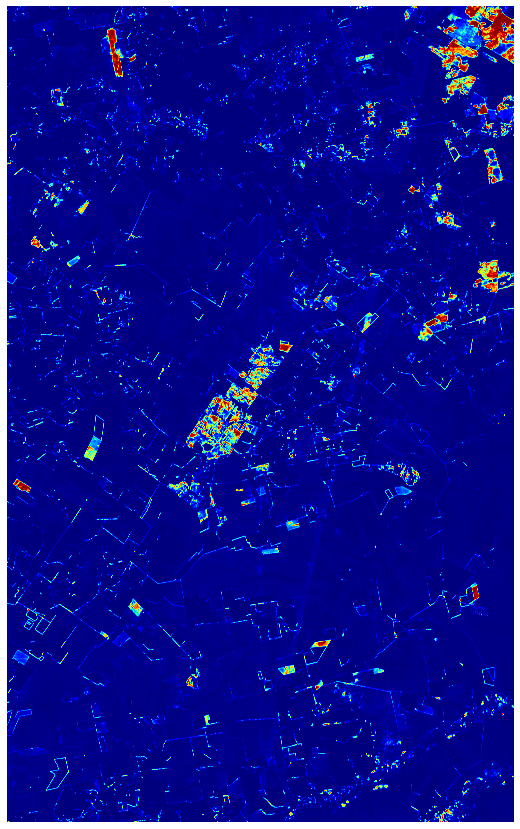

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(pred_entropy, cmap='jet')
plt.axis('off')


In [52]:
np.mean(pred_entropy)

0.012668651

In [53]:
# mean_prob.shape
pred_entropy[:label_mask.shape[0], :label_mask.shape[1]].shape

(16795, 10420)

In [54]:
ic(np.min(pred_entropy), np.mean(pred_entropy), np.max(pred_entropy))


ic| np.min(pred_entropy): 1.193959e-12
    np.mean(pred_entropy): 0.012668651
    np.max(pred_entropy): 0.36787948


(1.193959e-12, 0.012668651, 0.36787948)

In [55]:
predicted = np.zeros_like(mean_prob).astype(np.uint8)
threshold = 0.5
predicted[mean_prob>=threshold] = 1
min_polygon_area = 625
predicted_without_small_polygons = skimage.morphology.area_opening(predicted, 
        area_threshold = min_polygon_area, connectivity=1)

predicted_small_polygons = predicted - predicted_without_small_polygons


In [56]:
pred_entropy_to_show[predicted_small_polygons == 1] = 0
ic(pred_entropy_to_show.shape)

ic| pred_entropy_to_show.shape: (16795, 10420)


(16795, 10420)

(-0.5, 10419.5, 16794.5, -0.5)

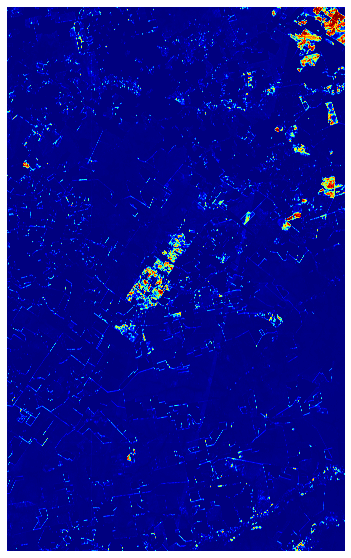

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(pred_entropy_to_show, cmap='jet')
plt.axis('off')


In [58]:
ic(np.min(pred_entropy_to_show), np.mean(pred_entropy_to_show), np.max(pred_entropy_to_show))

ic| np.min(pred_entropy_to_show): 0.0
    np.mean(pred_entropy_to_show): 0.010195099
    np.max(pred_entropy_to_show): 0.36787948


(0.0, 0.010195099, 0.36787948)

In [59]:

georreferenced_save = False

In [60]:
import utils_v1
import rasterio

if georreferenced_save == True:
    georref_im = utils_v1.load_tiff_image('D:/Jorge/datasets/sentinel2/MT_2019/S2_R1_MT_2019_08_02_2019_08_05_B3_B4.tif')

In [61]:
if georreferenced_save == True:
    georref_im.shape

In [62]:
ic(pred_entropy_unpad.shape, pred_entropy.shape)
ic(predicted.shape, label_mask.shape)

ic| pred_entropy_unpad.shape: (16795, 10420)
    pred_entropy.shape: (16800, 10432)
ic| predicted.shape: (16795, 10420), label_mask.shape: (16795, 10420)


((16795, 10420), (16795, 10420))

In [63]:
prediced_to_show = predicted.copy()
prediced_to_show[label_mask == 2] = 0

label_mask_current_deforestation = label_mask.copy()
label_mask_current_deforestation[label_mask_current_deforestation==2] = 0

false_positive_mask = prediced_to_show - label_mask_current_deforestation
false_positive_mask = (false_positive_mask + 1).astype(np.int8)
ic(np.unique(false_positive_mask, return_counts=True))

ic| np.unique(false_positive_mask, return_counts=True): (array([0, 1, 2], dtype=int8),
                                                         array([   615524, 174065616,    322760], dtype=int64))


(array([0, 1, 2], dtype=int8),
 array([   615524, 174065616,    322760], dtype=int64))

In [64]:
if georreferenced_save == True:
    original_im_path = 'D:/Jorge/datasets/sentinel2/MT_2019/S2_R1_MT_2019_08_02_2019_08_05_B3_B4.tif'

## Save georreferenced images

In [65]:
if georreferenced_save == True:

    pred_entropy_to_show_pad = rasterTools.padForGeorreferencing(pred_entropy_to_show)

    ic(np.min(pred_entropy_to_show_pad), np.mean(pred_entropy_to_show_pad), np.max(pred_entropy_to_show_pad))

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(pred_entropy_to_show_pad, cmap='jet')
    plt.axis('off')

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_uncertainty_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(pred_entropy_to_show_pad, axis=0).astype(np.float32), produced_im_path, bands = 1,
                    nodata=-1)

In [66]:
if georreferenced_save == True:
    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_false_positive_mask_georreferenced.tif'
    false_positive_mask_pad = rasterTools.padForGeorreferencing(false_positive_mask, pad_value = 255)
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(false_positive_mask_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

In [67]:
if georreferenced_save == True:

    label_mask_pad = rasterTools.padForGeorreferencing(label_mask, pad_value = 255)
    label_mask_pad.dtype

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_ground_truth_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(label_mask_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

    predicted_pad = rasterTools.padForGeorreferencing(predicted, pad_value = 255)
    predicted_pad.dtype
    predicted_pad[label_mask_pad == 2] = 2

    ic(np.unique(predicted_pad, return_counts=True))

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_predicted_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(predicted_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

                

In [68]:

if georreferenced_save == True:

    im_t0_pad = rasterTools.padForGeorreferencingChannels(image_stack[...,[3,2,1]])
    im_t0_pad = np.transpose(im_t0_pad, (2, 0, 1))
    print(np.min(image_stack[...,[13,12,11]]), np.mean(image_stack[...,[13,12,11]]), np.max(image_stack[...,[13,12,11]]))


    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_sentinel2_2019_rgb_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    im_t0_pad.astype(np.float32), produced_im_path, bands = 3,
                    nodata=-1)

    im_t1_pad = rasterTools.padForGeorreferencingChannels(image_stack[...,[13,12,11]])
    im_t1_pad = np.transpose(im_t1_pad, (2, 0, 1))
    print(im_t1_pad.shape)

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/figures/MT_sentinel2_2020_rgb_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    im_t1_pad.astype(np.float32), produced_im_path, bands = 3,
                    nodata=-1)
    

In [69]:
uncertainty_mask.dtype

dtype('int8')

In [70]:


if georreferenced_save == True:
    uncertainty_mask_pad = rasterTools.padForGeorreferencingChannels(uncertainty_mask)
    uncertainty_mask_pad = np.transpose(uncertainty_mask_pad, (2, 0, 1))

    uncertainty_mask_without_small_polygons_pad = rasterTools.padForGeorreferencingChannels(
        uncertainty_mask_without_small_polygons)
    uncertainty_mask_without_small_polygons_pad = np.transpose(
        uncertainty_mask_without_small_polygons_pad, (2, 0, 1))

(-0.5, 10419.5, 16794.5, -0.5)

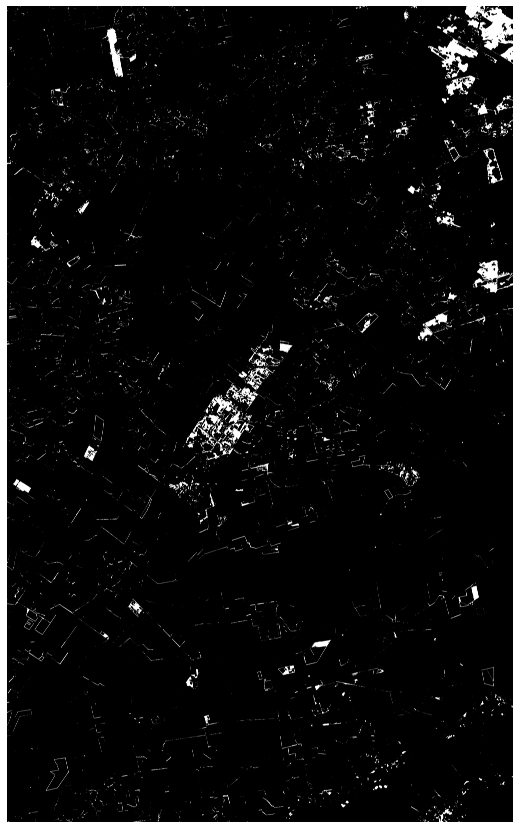

In [71]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(uncertainty_mask, cmap=plt.cm.gray)
plt.axis('off')


In [72]:
ic(np.unique(uncertainty_mask, return_counts=True))

ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64))


(array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64))

In [73]:
# contours, _ = cv2.findContours(uncertainty_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);

In [74]:
# len(contours)

In [75]:
# for con in contours:
#     area = cv2.contourArea(con);
#     print(area)

In [76]:
connectivity = 4  
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    uncertainty_mask, connectivity, cv2.CV_32S)


In [77]:
ic(num_labels)

ic| num_labels: 12321


12321

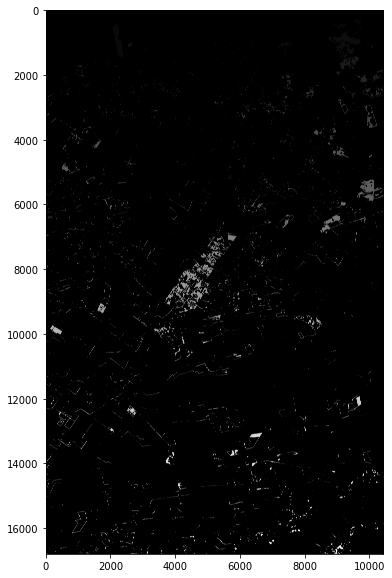

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(labels, cmap = plt.cm.gray)

In [79]:
area = stats[1:,-1]

In [80]:
stats[44:55]

array([[ 7186,    19,    32,    48,   801],
       [ 7243,    18,    13,    25,   203],
       [ 9864,    19,    54,    75,   846],
       [ 9028,    21,     1,     3,     3],
       [ 1240,    23,    31,    51,   284],
       [ 2812,    22,     1,     2,     2],
       [ 3450,    22,     9,    11,    75],
       [ 4042,    23,     3,     4,     8],
       [ 4504,    23,     4,     9,    16],
       [10390,    23,    19,     4,    53],
       [ 3382,    25,    20,    14,   126]], dtype=int32)

In [81]:
ic(np.min(area),np.mean(area),np.max(area))

ic| np.min(area): 1
    np.mean(area): 362.87410714285716
    np.max(area): 471378


(1, 362.87410714285716, 471378)

In [82]:
np.argmax(area)

28

In [83]:
area.shape

(12320,)

In [139]:
if issubclass(type(dataset), MT):
    bin_n = 435
    bin_n = 452
    bin_n = 755 # early dates

elif issubclass(type(dataset), PA):
    bin_n = 140
    bin_n = 113
    bin_n = 258 # early dates

bin_n

755

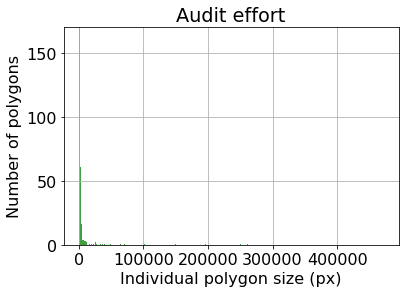

In [140]:
import matplotlib.pyplot as plt
# bin_n = 450
n, bins, patches = plt.hist(area, bin_n, facecolor='g', alpha=0.75)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Number of polygons')
plt.title('Audit effort')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-100, 2000)
plt.ylim(0, 170)
plt.grid(True)
plt.show()

In [141]:
# ic(bins, bins[2]-bins[1], bins[3]-bins[2], bins[4]-bins[3])
bin_size = round(bins[2]-bins[1], 1)
ic(bin_size)

ic| bin_size: 624.3


624.3

In [142]:
import pdb
def getBinAreaSum(areas, bin_n, bin_size):
    areaSumPerBin = []
    for bin_id in range(bin_n):
        areaSum = 0
        for area in areas:
            if area > bin_size * bin_id and area < bin_size * (bin_id + 1):
                areaSum = areaSum + area
                # print(areaSum)
                # pdb.set_trace()
        areaSumPerBin.append(areaSum)
    return areaSumPerBin
        


areaSumPerBin = getBinAreaSum(area, bin_n, bin_size)    
ic(areaSumPerBin)

ic| areaSumPerBin: [693718,
                    301075,
                    181184,
                    130972,
                    109659,
                    64827,
                    64266,
                    70566,
                    20885,
                    29892,
                    52166,
                    28377,
                    47365,
                    25535,
                    26844,
                    9931,
                    30788,
                    33023,
                    23128,
                    24344,
                    12575,
                    0,
                    13805,
                    0,
                    0,
                    15673,
                    16361,
                    34148,
                    0,
                    36776,
                    19103,
                    19775,
                    20423,
                    0,
                    21783,
                    0,
                    23087,
                    0

[693718,
 301075,
 181184,
 130972,
 109659,
 64827,
 64266,
 70566,
 20885,
 29892,
 52166,
 28377,
 47365,
 25535,
 26844,
 9931,
 30788,
 33023,
 23128,
 24344,
 12575,
 0,
 13805,
 0,
 0,
 15673,
 16361,
 34148,
 0,
 36776,
 19103,
 19775,
 20423,
 0,
 21783,
 0,
 23087,
 0,
 0,
 0,
 25392,
 51685,
 52936,
 27044,
 0,
 56362,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 33257,
 68092,
 0,
 0,
 71574,
 36754,
 0,
 0,
 38156,
 39093,
 39774,
 40218,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 48865,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 64683,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70815,
 0,
 0,
 0,
 0,
 0,
 74463,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 101231,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [143]:
bins

array([1.00000000e+00, 6.25340397e+02, 1.24968079e+03, 1.87402119e+03,
       2.49836159e+03, 3.12270199e+03, 3.74704238e+03, 4.37138278e+03,
       4.99572318e+03, 5.62006358e+03, 6.24440397e+03, 6.86874437e+03,
       7.49308477e+03, 8.11742517e+03, 8.74176556e+03, 9.36610596e+03,
       9.99044636e+03, 1.06147868e+04, 1.12391272e+04, 1.18634675e+04,
       1.24878079e+04, 1.31121483e+04, 1.37364887e+04, 1.43608291e+04,
       1.49851695e+04, 1.56095099e+04, 1.62338503e+04, 1.68581907e+04,
       1.74825311e+04, 1.81068715e+04, 1.87312119e+04, 1.93555523e+04,
       1.99798927e+04, 2.06042331e+04, 2.12285735e+04, 2.18529139e+04,
       2.24772543e+04, 2.31015947e+04, 2.37259351e+04, 2.43502755e+04,
       2.49746159e+04, 2.55989563e+04, 2.62232967e+04, 2.68476371e+04,
       2.74719775e+04, 2.80963179e+04, 2.87206583e+04, 2.93449987e+04,
       2.99693391e+04, 3.05936795e+04, 3.12180199e+04, 3.18423603e+04,
       3.24667007e+04, 3.30910411e+04, 3.37153815e+04, 3.43397219e+04,
      

In [144]:
matplotlib.rcParams.update({'font.size': 16})


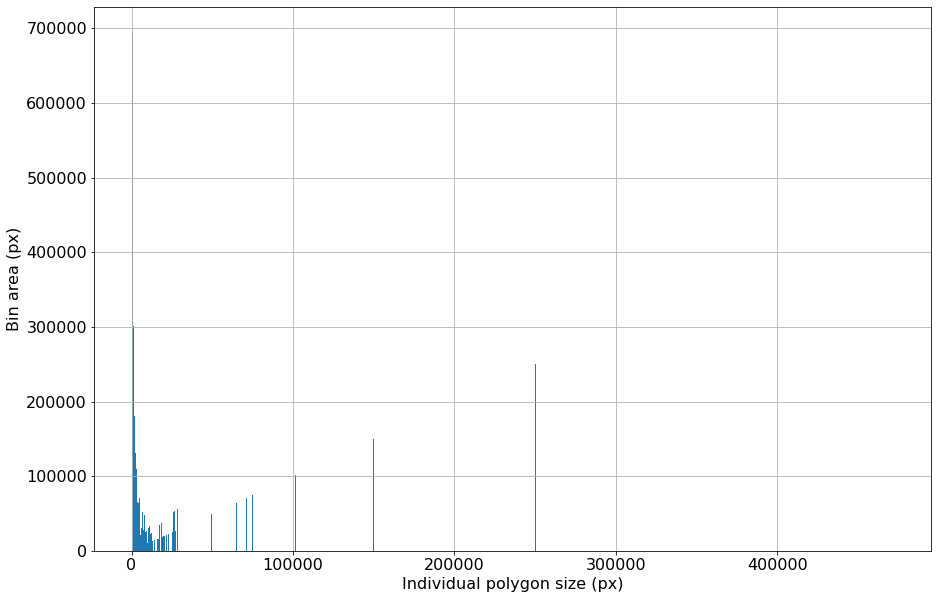

In [145]:

plt.figure(figsize = (15,10))
width = 500
plt.bar(bins[1:], areaSumPerBin, width)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Bin area (px)')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_area_sum_per_bin.png', dpi=150, bbox_inches='tight')

In [146]:
ic(bins.shape, n.shape)

ic| bins.shape: (756,), n.shape: (755,)


((756,), (755,))

In [147]:
ic(np.sum(n))

ic(np.sum(n) - n[0])

ic| np.sum(n): 12320.0
ic| np.sum(n) - n[0]: 703.0


703.0

In [148]:
bins[1:]

array([   625.34039735,   1249.6807947 ,   1874.02119205,   2498.3615894 ,
         3122.70198675,   3747.04238411,   4371.38278146,   4995.72317881,
         5620.06357616,   6244.40397351,   6868.74437086,   7493.08476821,
         8117.42516556,   8741.76556291,   9366.10596026,   9990.44635762,
        10614.78675497,  11239.12715232,  11863.46754967,  12487.80794702,
        13112.14834437,  13736.48874172,  14360.82913907,  14985.16953642,
        15609.50993377,  16233.85033113,  16858.19072848,  17482.53112583,
        18106.87152318,  18731.21192053,  19355.55231788,  19979.89271523,
        20604.23311258,  21228.57350993,  21852.91390728,  22477.25430464,
        23101.59470199,  23725.93509934,  24350.27549669,  24974.61589404,
        25598.95629139,  26223.29668874,  26847.63708609,  27471.97748344,
        28096.31788079,  28720.65827815,  29344.9986755 ,  29969.33907285,
        30593.6794702 ,  31218.01986755,  31842.3602649 ,  32466.70066225,
        33091.0410596 ,  

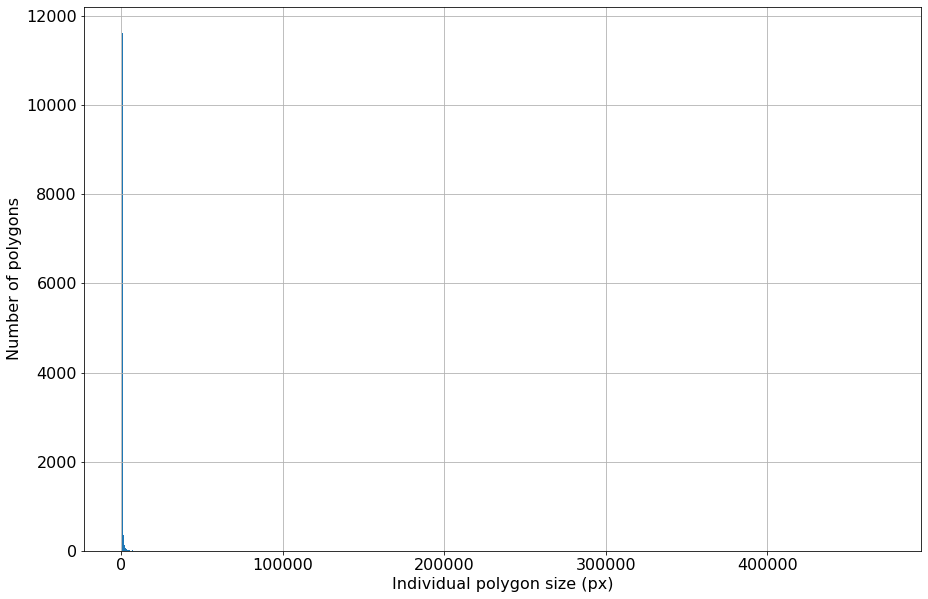

In [149]:

plt.figure(figsize = (15,10))
plt.bar(bins[1:], n, width)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Number of polygons')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_bin_area.png', dpi=150, bbox_inches='tight')

In [150]:
def getCumulativeArea(areaSumPerBin):
    cumulativeArea = []
    cumulativeSum = 0
    # for areaSum in areaSumPerBin: 
    for areaSum in areaSumPerBin[::-1]:
        cumulativeSum = cumulativeSum + areaSum
        cumulativeArea.append(cumulativeSum)
    # return np.asarray(cumulativeArea) 
    return np.asarray(cumulativeArea)[::-1]



cumulativeArea = getCumulativeArea(areaSumPerBin)
ic(cumulativeArea.shape)

ic| cumulativeArea.shape: (755,)


(755,)

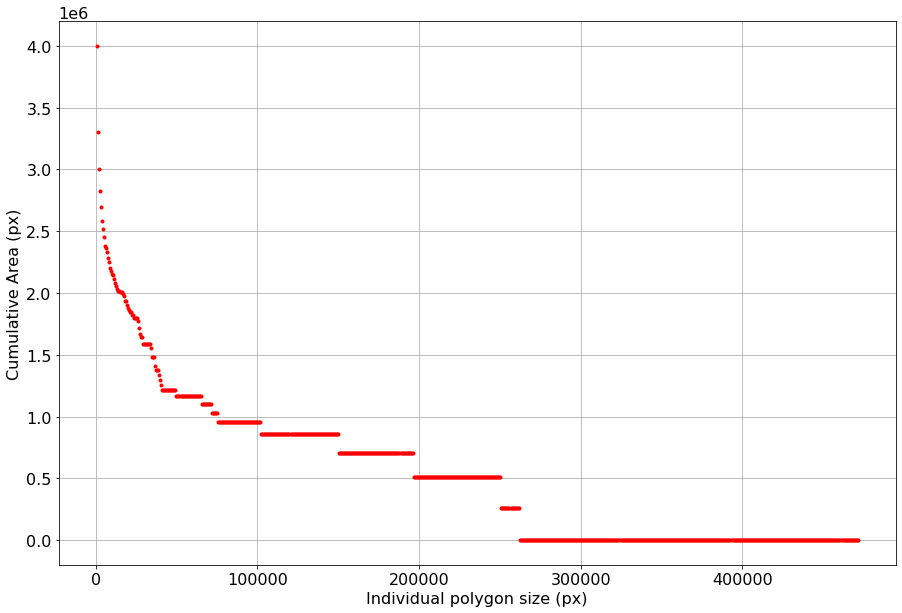

In [151]:

plt.figure(figsize = (15,10))
plt.plot(bins[1:], cumulativeArea,'r.')


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Cumulative Area (px)')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_cumulative_area.png', dpi=150, bbox_inches='tight')

In [152]:
cumulativeArea/cumulativeArea[0]

array([1.        , 0.82653715, 0.75125393, 0.70594922, 0.67319992,
       0.6457799 , 0.62957003, 0.61350045, 0.59585555, 0.5906333 ,
       0.58315886, 0.57011485, 0.56301924, 0.55117571, 0.54479074,
       0.53807845, 0.53559522, 0.52789674, 0.5196394 , 0.51385629,
       0.50776912, 0.50462476, 0.50462476, 0.50117285, 0.50117285,
       0.50117285, 0.49725385, 0.49316281, 0.48462417, 0.48462417,
       0.4754284 , 0.47065173, 0.46570703, 0.4606003 , 0.4606003 ,
       0.4551535 , 0.4551535 , 0.44938064, 0.44938064, 0.44938064,
       0.44938064, 0.44303142, 0.43010769, 0.41687114, 0.41010884,
       0.41010884, 0.39601563, 0.39601563, 0.39601563, 0.39601563,
       0.39601563, 0.39601563, 0.39601563, 0.39601563, 0.38769979,
       0.37067351, 0.37067351, 0.37067351, 0.35277657, 0.3435863 ,
       0.3435863 , 0.3435863 , 0.33404547, 0.32427034, 0.31432493,
       0.3042685 , 0.3042685 , 0.3042685 , 0.3042685 , 0.3042685 ,
       0.3042685 , 0.3042685 , 0.3042685 , 0.3042685 , 0.30426

<Figure size 1080x720 with 0 Axes>

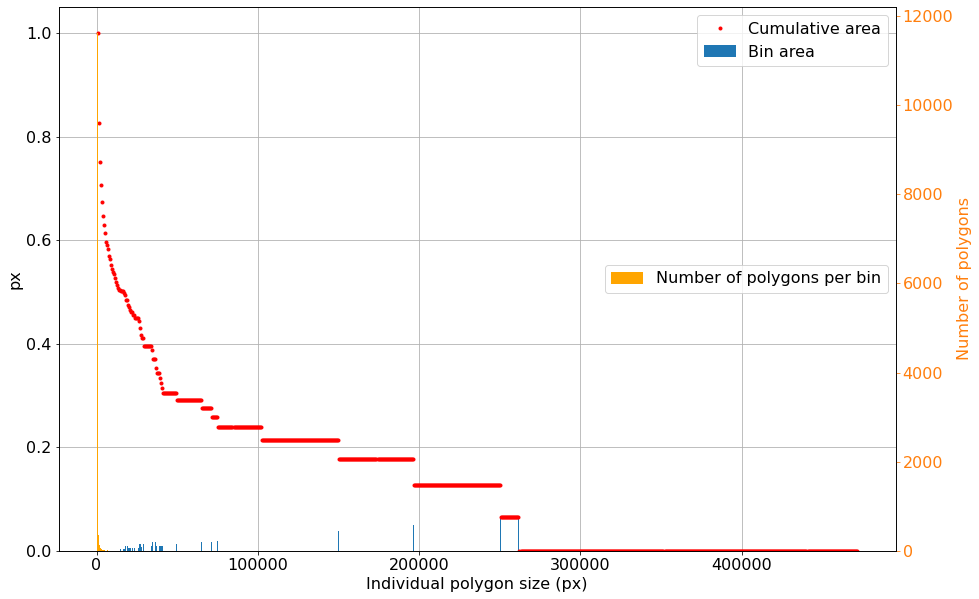

In [153]:


plt.figure(figsize = (15,10))

# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax2 = ax1.twinx()

ax1.bar(bins[1:]+width/2, areaSumPerBin/cumulativeArea[0], width, label = 'Bin area')
ax1.plot(bins[1:], cumulativeArea/cumulativeArea[0],'r.', label = 'Cumulative area')

ax1.set_xlabel('Individual polygon size (px)')
ax1.set_ylabel('px')
ax1.legend(loc = 'upper right')

ax2.bar(bins[1:]-width/2, n, width, color = 'orange', label = 'Number of polygons per bin')
ax2.legend(loc = 'center right')
ax2.set_ylabel('Number of polygons', color="C1")
ax2.tick_params(axis='y', colors='C1')

# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
ax1.grid(True)
plt.savefig('output/figures/polygon_analysis.png', dpi=150, bbox_inches='tight')

<Figure size 1080x720 with 0 Axes>

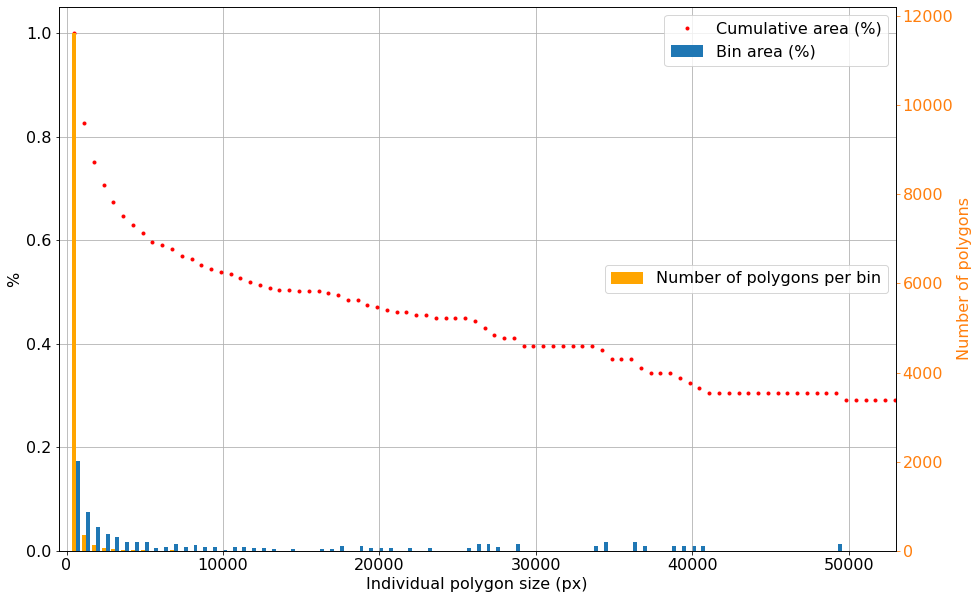

In [154]:


plt.figure(figsize = (15,10))
width = 250
# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax2 = ax1.twinx()

ax1.bar(bins[1:]+width/2, areaSumPerBin/cumulativeArea[0], width, label = 'Bin area (%)')
ax1.plot(bins[1:]-width/2, cumulativeArea/cumulativeArea[0],'r.', label = 'Cumulative area (%)')

ax1.set_xlabel('Individual polygon size (px)')
ax1.set_ylabel('%')
ax1.legend(loc = 'upper right')

ax2.bar(bins[1:]-width/2, n, width, color = 'orange', label = 'Number of polygons per bin')
ax2.legend(loc = 'center right')
ax2.set_ylabel('Number of polygons', color="C1")
ax2.tick_params(axis='y', colors='C1')

ax1.set_xlim([-500, 53000])
ax2.set_xlim([-500, 53000])

# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
ax1.grid(True)
plt.savefig('output/figures/polygon_analysis_percentage.png', dpi=150, bbox_inches='tight')

<Figure size 1080x360 with 0 Axes>

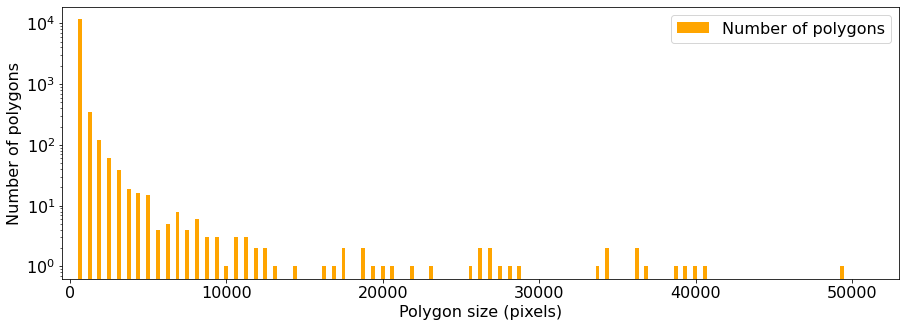

<Figure size 1080x360 with 0 Axes>

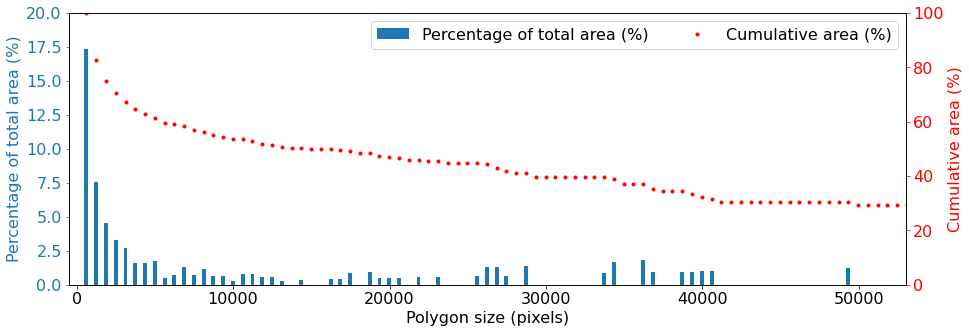

In [167]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize = (15,5))
width = 250
# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)
# fig, ax1 = plt.subplots()
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

ax.bar(bins[1:], n, width, color = 'orange', label = 'Number of polygons', log=True)
ax.legend(loc = 'upper right')
ax.set_ylabel('Number of polygons')
ax.set_xlabel('Polygon size (pixels)')
ax.set_xlim([-500, 53000])

plt.savefig('output/figures/polygon_analysis_percentage_split1.png', dpi=150, bbox_inches='tight')

plt.figure(figsize = (15,5))
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

ax2 = ax.twinx()

ax2.plot(bins[1:], cumulativeArea/cumulativeArea[0]*100,'r.', label = 'Cumulative area (%)')
ax.bar(bins[1:], areaSumPerBin/cumulativeArea[0]*100, width, label = 'Percentage of total area (%)')

# ax.plot(bins[1:], cumulativeArea/cumulativeArea[-1],color='r', linestyle='None', label = 'Cumulative area (%)')

ax.set_xlabel('Polygon size (pixels)')
# ax.legend(loc = 'upper right')
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
#           ncol=2)
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.6),
#           ncol=2)

# added these three lines
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.6),
#           ncol=2)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.88),
          ncol=2)


ax.set_ylabel('Percentage of total area (%)', color="C0")
ax.tick_params(axis='y', colors='C0')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylabel('Cumulative area (%)', color="r")
ax2.tick_params(axis='y', colors='r', )
# ax2.grid()
          
ax.set_xlim([-500, 53000])

ax.set_ylim([0.0, 20])
ax2.set_ylim([0.0, 100])
plt.savefig('output/figures/polygon_analysis_percentage_split2.png', dpi=150, bbox_inches='tight')

In [156]:
bins

array([1.00000000e+00, 6.25340397e+02, 1.24968079e+03, 1.87402119e+03,
       2.49836159e+03, 3.12270199e+03, 3.74704238e+03, 4.37138278e+03,
       4.99572318e+03, 5.62006358e+03, 6.24440397e+03, 6.86874437e+03,
       7.49308477e+03, 8.11742517e+03, 8.74176556e+03, 9.36610596e+03,
       9.99044636e+03, 1.06147868e+04, 1.12391272e+04, 1.18634675e+04,
       1.24878079e+04, 1.31121483e+04, 1.37364887e+04, 1.43608291e+04,
       1.49851695e+04, 1.56095099e+04, 1.62338503e+04, 1.68581907e+04,
       1.74825311e+04, 1.81068715e+04, 1.87312119e+04, 1.93555523e+04,
       1.99798927e+04, 2.06042331e+04, 2.12285735e+04, 2.18529139e+04,
       2.24772543e+04, 2.31015947e+04, 2.37259351e+04, 2.43502755e+04,
       2.49746159e+04, 2.55989563e+04, 2.62232967e+04, 2.68476371e+04,
       2.74719775e+04, 2.80963179e+04, 2.87206583e+04, 2.93449987e+04,
       2.99693391e+04, 3.05936795e+04, 3.12180199e+04, 3.18423603e+04,
       3.24667007e+04, 3.30910411e+04, 3.37153815e+04, 3.43397219e+04,
      

In [157]:
ic(np.sum(n), np.sum(n[1:]), np.sum(n[2:]))


ic| np.sum(n): 12320.0, np.sum(n[1:]): 703.0, np.sum(n[2:]): 356.0


(12320.0, 703.0, 356.0)

In [158]:
ic(labels.shape, label_mask.shape)

ic| labels.shape: (16795, 10420), label_mask.shape: (16795, 10420)


((16795, 10420), (16795, 10420))

(-0.5, 10419.5, 16794.5, -0.5)

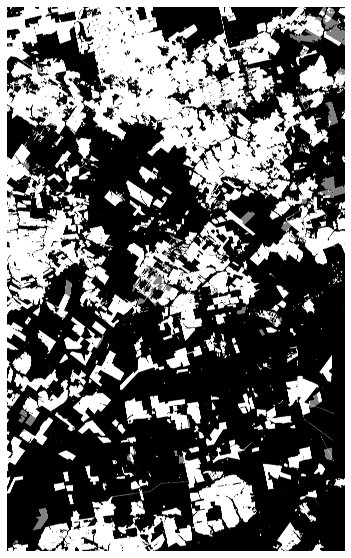

In [159]:
plt.figure(figsize=(10,10))
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 10419.5, 16794.5, -0.5)

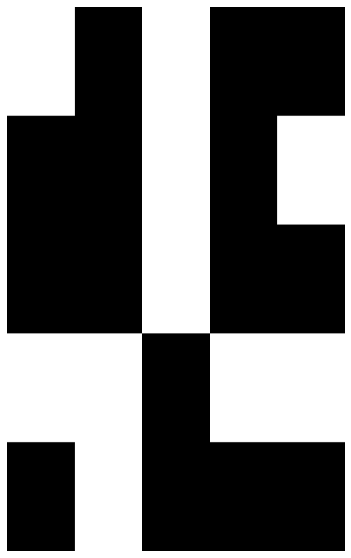

In [160]:
plt.figure(figsize=(10,10))
plt.imshow(mask_amazon_ts, cmap=plt.cm.gray)
plt.axis('off')


(-0.5, 10419.5, 16794.5, -0.5)

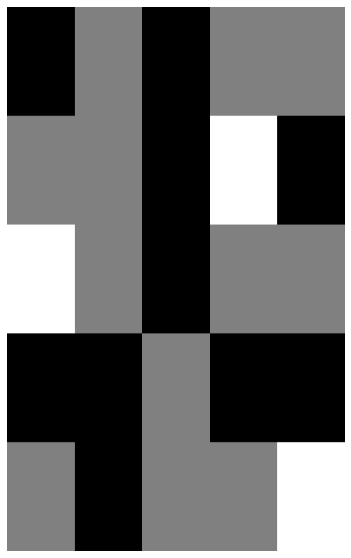

In [161]:
plt.figure(figsize=(10,10))
plt.imshow(mask_tr_val, cmap=plt.cm.gray)
plt.axis('off')


In [162]:
label_current_deforestation = label_mask.copy()
label_current_deforestation[label_current_deforestation == 2] = 0
label_current_deforestation = label_current_deforestation.astype(np.bool)

C:\Users\jchamorro\AppData\Local\Temp\ipykernel_16072\2548657025.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_current_deforestation = label_current_deforestation.astype(np.bool)


In [163]:
ic(np.unique(uncertainty_mask, return_counts=True),
    np.unique(label_mask, return_counts=True),
    np.unique(mask_amazon_ts, return_counts=True))


ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64))
    np.unique(label_mask, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                array([109996296,   2271496,  62736108], dtype=int64))
    np.unique(mask_amazon_ts, return_counts=True): (array([0, 1], dtype=uint8), array([105002340,  70001560], dtype=int64))


((array([0, 1], dtype=int8), array([170533291,   4470609], dtype=int64)),
 (array([0, 1, 2], dtype=uint8),
  array([109996296,   2271496,  62736108], dtype=int64)),
 (array([0, 1], dtype=uint8), array([105002340,  70001560], dtype=int64)))

In [164]:
'''
plt.figure(figsize=(10,10))
plt.imshow(total_test_area, cmap=plt.cm.gray)
plt.axis('off')
'''

"\nplt.figure(figsize=(10,10))\nplt.imshow(total_test_area, cmap=plt.cm.gray)\nplt.axis('off')\n"

In [165]:
def countIntersectingPolygons(labels, deforestation_polygons):
    ic(np.max(labels))
    count_intersecting_polygons = 0

    for polygon_id in range(np.max(labels)):
        if polygon_id % 500 == 0:
            print(polygon_id, count_intersecting_polygons)
        polygon_mask = labels.copy()
        polygon_mask[polygon_mask != polygon_id] = 0
        polygon_mask = polygon_mask.astype(np.bool)

        
        if np.any(polygon_mask & deforestation_polygons):
            count_intersecting_polygons += 1
    return count_intersecting_polygons
countIntersectingPolygonsFlag = False
if countIntersectingPolygonsFlag == True:
    # count_intersecting_polygons = countIntersectingPolygons(labels, label_current_deforestation)
    count_intersecting_polygons = countIntersectingPolygons(labels, predicted.astype(np.bool))

    ic(count_intersecting_polygons)

In [166]:

if countIntersectingPolygonsFlag == True:
    count_intersecting_polygons/np.max(labels)